In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import AgglomerativeClustering
import pickle
from matplotlib.patches import Circle, PathPatch
warnings.filterwarnings("ignore")
plt.rcParams['font.family']="sans-serif"
plt.rcParams['font.sans-serif']=["Arial"]+ plt.rcParams['font.serif']
def rotation_pos(old, angle):
    t = np.radians(angle)
    cos_theta = np.cos(t)
    sin_theta = np.sin(t)
    rotation_matrix = np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])
    new = rotation_matrix@old
    return new
def scale_pos(old, scale_x, scale_y):
    scale_matrix = np.array([[scale_x, 0], [0, scale_y]])
    new = scale_matrix @ old
    return new

class clean_Circle(object):
    def __init__(self,radius,center):
        self.radius=radius
        self.center=center
    def get_radius(self):
        return self.radius
    def get_center(self):
        return self.center
    
def get_cricle_data(adata,clean_Circle):
    adata.obs["x"],adata.obs["y"]=adata.obsm["spatial"][:,0],adata.obsm["spatial"][:,1]
    c_adata=adata[np.sqrt((adata.obs.x-clean_Circle.get_center()[0])**2+(adata.obs.y-clean_Circle.get_center()[1])**2)<=clean_Circle.get_radius()]
    return c_adata
    
circle_0=clean_Circle(radius=2500,center=(1300,-4350))
circle_1=clean_Circle(radius=2400,center=(4300,-1100))

order_list= ['spatialign', 'precast', 'graphST', 'scalex', 'harmony', 'combat', 'BBKNN', 'scanorama', 'mnn']
name_list=['Spatialign', 'PRECAST', 'GraphST', 'SCALEX', 'Harmony', 'Combat', 'BBKNN', 'Scanorama', 'MNN']

In [4]:
spatialign_merge=sc.read_h5ad("./data/spatialign_merge_for_figure.h5ad")
# spatialign_merge.obs.batch.cat.categories=["0","1","2"]

In [5]:
spatialign_merge

AnnData object with n_obs × n_vars = 69528 × 11376
    obs: 'batch', 'louvain', 'leiden', 'hclust_16', 'hipp'
    uns: 'batch_colors', 'hclust_16_colors', 'leiden', 'leiden_colors', 'louvain', 'louvain_colors', 'neighbors', 'rank_genes_groups', 'umap'
    obsm: 'X_umap', 'correct', 'spatial'
    obsp: 'connectivities', 'distances'

In [2]:
import pickle
with open("./data/hclust_fig_final.pkl","rb") as f:
    data=pickle.load(f)

In [3]:
data

{'raw': AnnData object with n_obs × n_vars = 69528 × 11376
     obs: 'n_genes', 'x', 'y', 'batch', 'leiden', 'hclust_16'
     var: 'n_cells-0', 'n_cells-1', 'n_cells-2', 'hippocampus_data.counts...1.-2'
     uns: 'pca', 'neighbors', 'umap', 'leiden', 'batch_colors', 'leiden_colors', 'hclust_16_colors'
     obsm: 'spatial', 'X_pca', 'X_umap', 'X_umap_knn_connectivity', 'X_umap_knn_distances'
     obsp: 'distances', 'connectivities',
 'harmony': AnnData object with n_obs × n_vars = 69528 × 11376
     obs: 'n_genes', 'x', 'y', 'batch', 'leiden', 'hclust_16', 'hipp'
     var: 'n_cells-0', 'n_cells-1', 'n_cells-2', 'hippocampus_data.counts...1.-2'
     uns: 'pca', 'neighbors', 'umap', 'leiden', 'batch_colors', 'leiden_colors', 'hclust_16_colors', 'dendrogram_hclust_16'
     obsm: 'spatial', 'X_pca', 'X_umap', 'X_umap_knn_connectivity', 'X_umap_knn_distances', 'X_pca_harmony'
     obsp: 'distances', 'connectivities',
 'combat': AnnData object with n_obs × n_vars = 69528 × 11376
     obs: 'n_

In [4]:
spatialign_merge=data["spatialign"]

In [5]:
spatialign_merge.write_h5ad("./data/spatialign_merge_for_figure.h5ad")

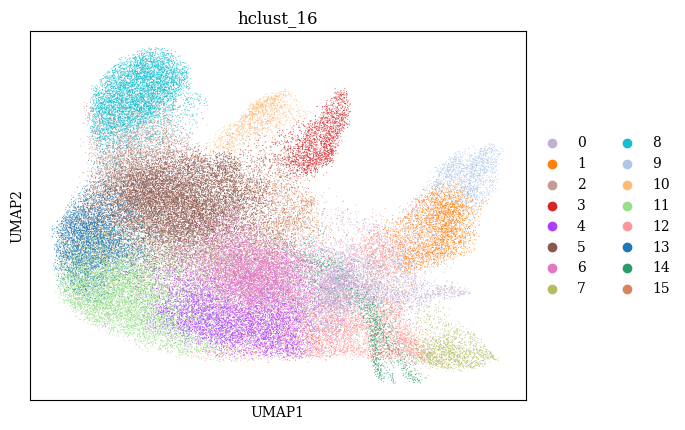

In [6]:
sc.pl.umap(spatialign_merge,color="hclust_16")

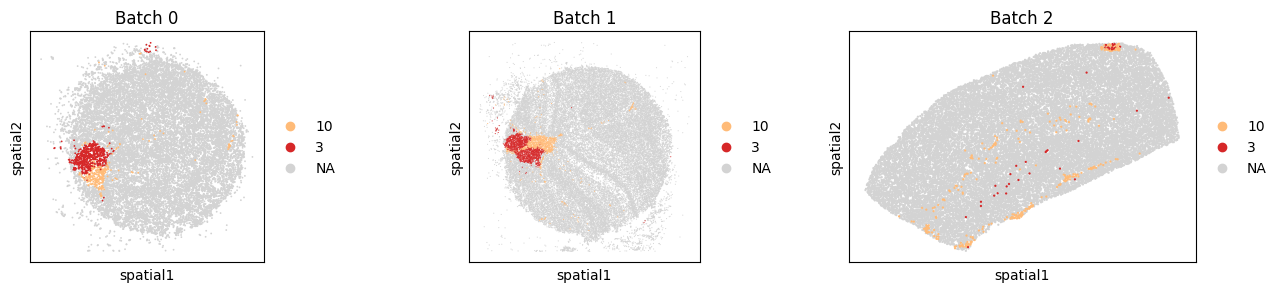

In [73]:
fig, ax = plt.subplots(1, 3, figsize=(16, 3))
sc.pl.spatial(spatialign_merge[spatialign_merge.obs["batch"] == "0"], color="hclust_16",groups=["3","10"],spot_size=50,ax=ax[0], title="Batch 0", show=False)
sc.pl.spatial(spatialign_merge[spatialign_merge.obs["batch"] == "1"], color="hclust_16",groups=["3","10"],spot_size=30,ax=ax[1], title="Batch 1", show=False)
sc.pl.spatial(spatialign_merge[spatialign_merge.obs["batch"] == "2"], color="hclust_16",groups=["3","10"],spot_size=30, ax=ax[2], title="Batch 2", show=False)

plt.show()

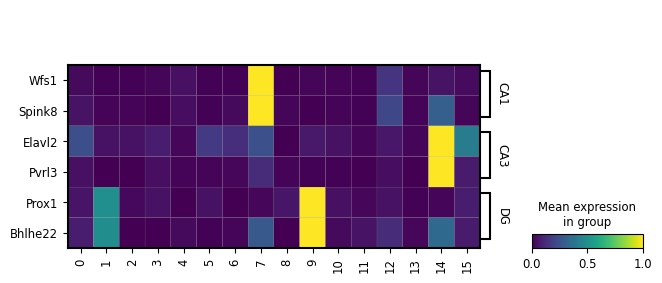

In [43]:
marker_dir={"CA1":["Wfs1","Spink8"],
            "CA3":["Elavl2","Pvrl3"],
            "DG":["Prox1","Bhlhe22"]}
sc.pl.matrixplot(data["spatialign"], marker_dir, groupby='hclust_16',standard_scale="var",save="heatmap.pdf",swap_axes=True,var_group_rotation=0)

raw


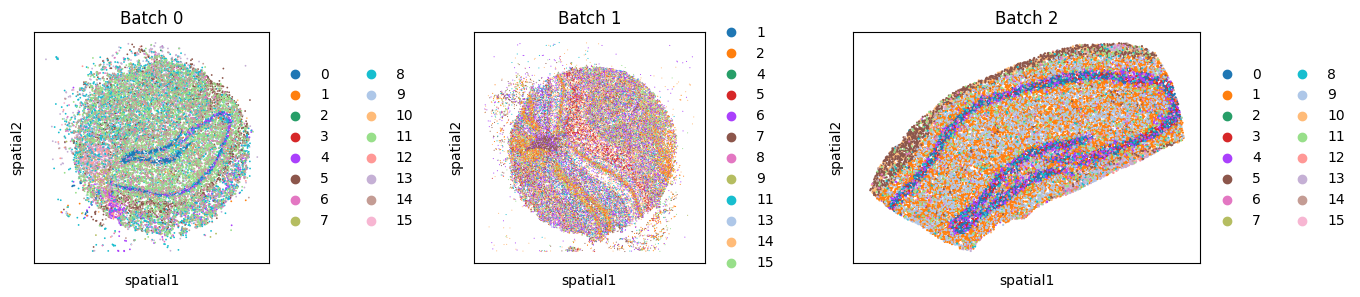

harmony


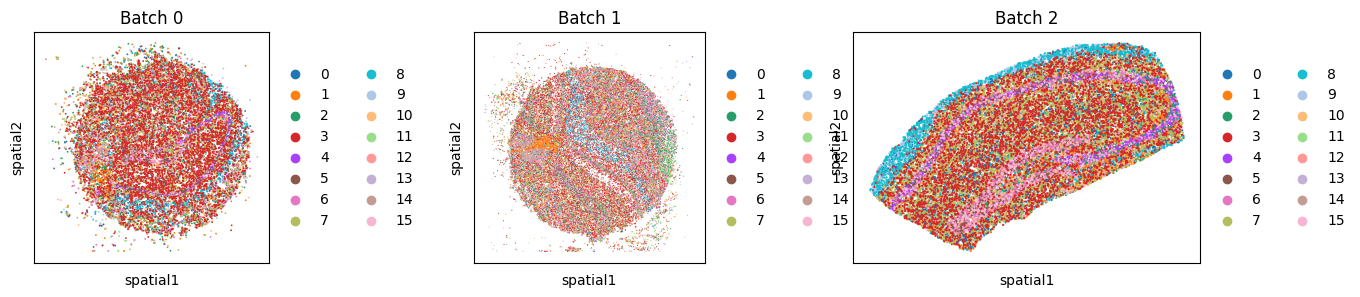

combat


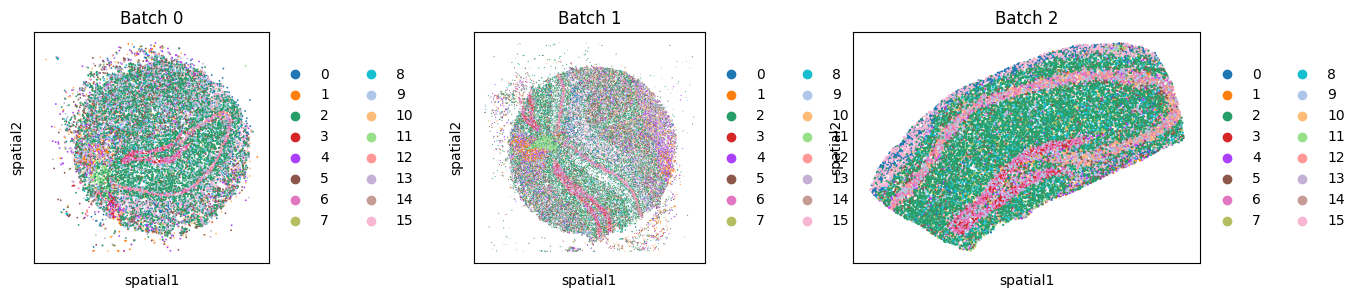

BBKNN
scanorama


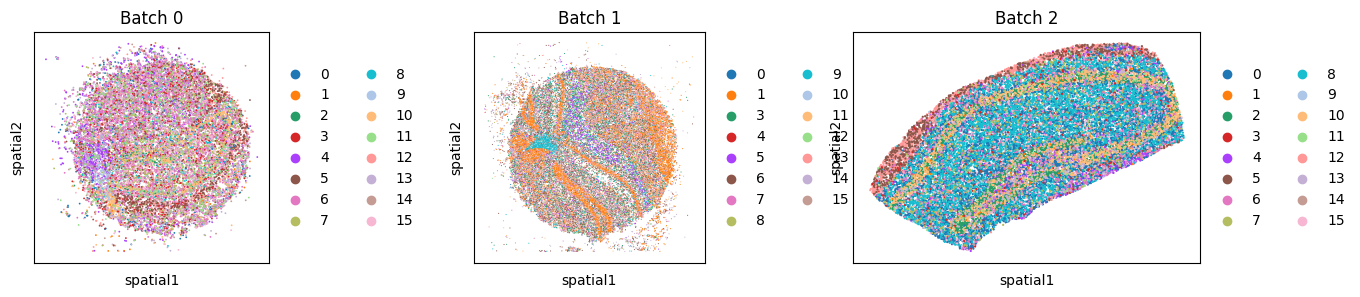

graphST


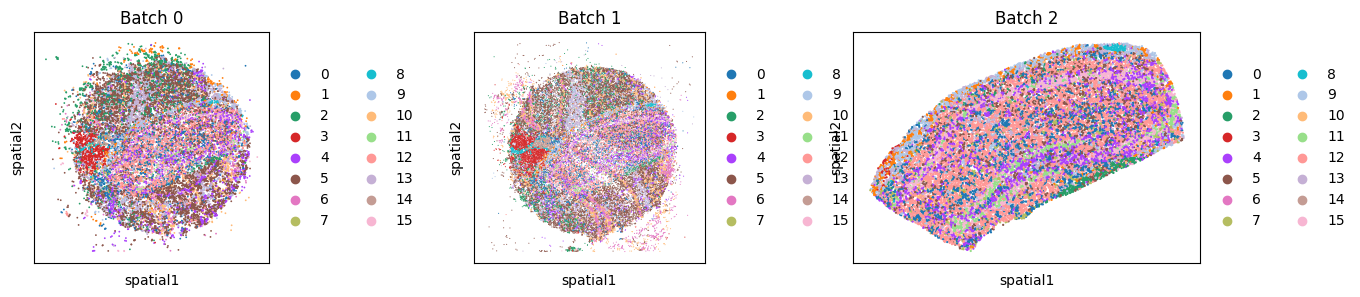

scalex


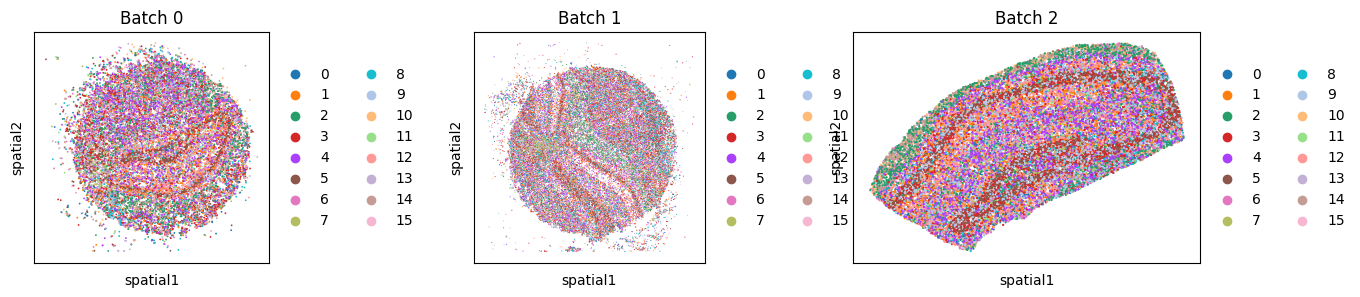

spatialign


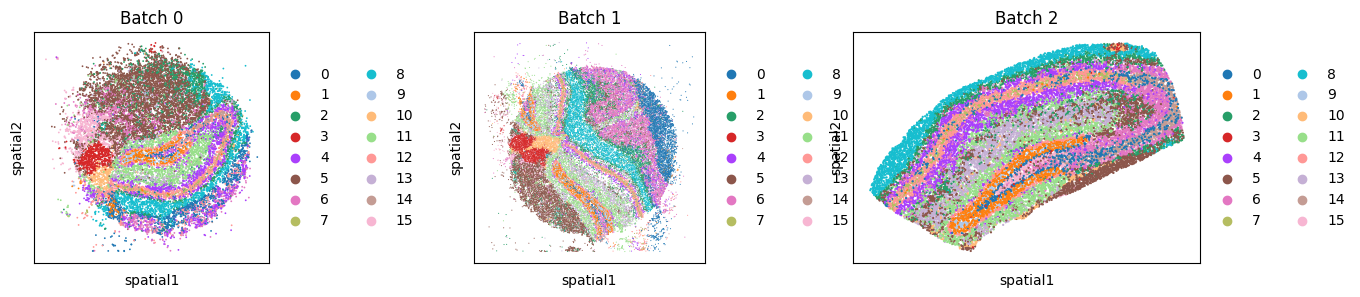

precast


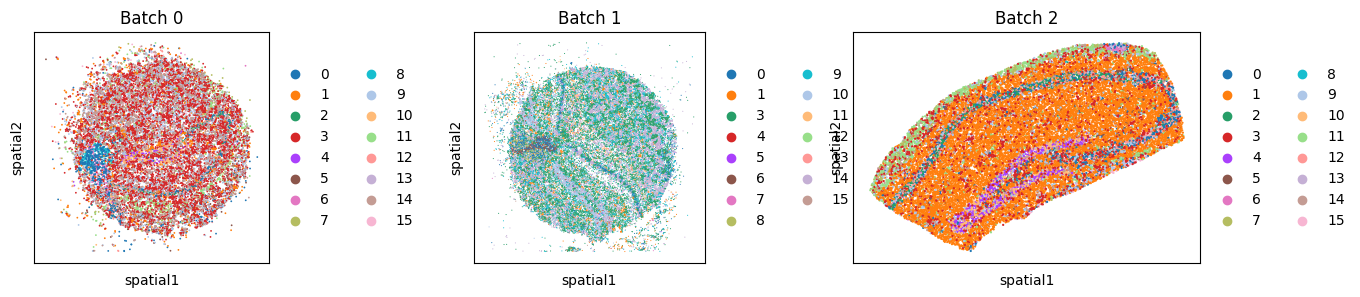

mnn


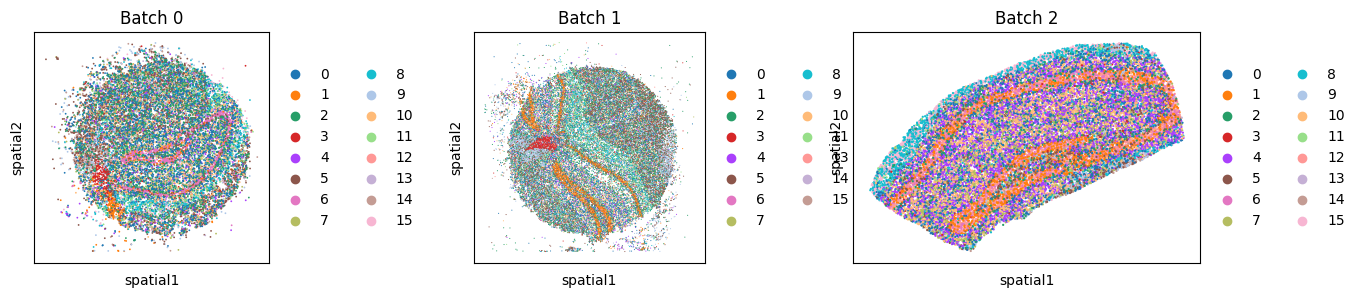

In [62]:
for i in list(data.keys()):
    print(i)
    if i=="BBKNN":
        continue
    fig, ax = plt.subplots(1, 3, figsize=(16, 3))
    sc.pl.spatial(data[i][data[i].obs["batch"] == "0"], color="hclust_16",spot_size=50,ax=ax[0], title="Batch 0", show=False)
    sc.pl.spatial(data[i][data[i].obs["batch"] == "1"], color="hclust_16",spot_size=30,ax=ax[1], title="Batch 1", show=False)
    sc.pl.spatial(data[i][data[i].obs["batch"] == "2"], color="hclust_16",spot_size=30, ax=ax[2], title="Batch 2", show=False)

    plt.show()

In [12]:
method_list=list(data.keys())
method_list.remove("raw")
method_list.remove("spatialign")


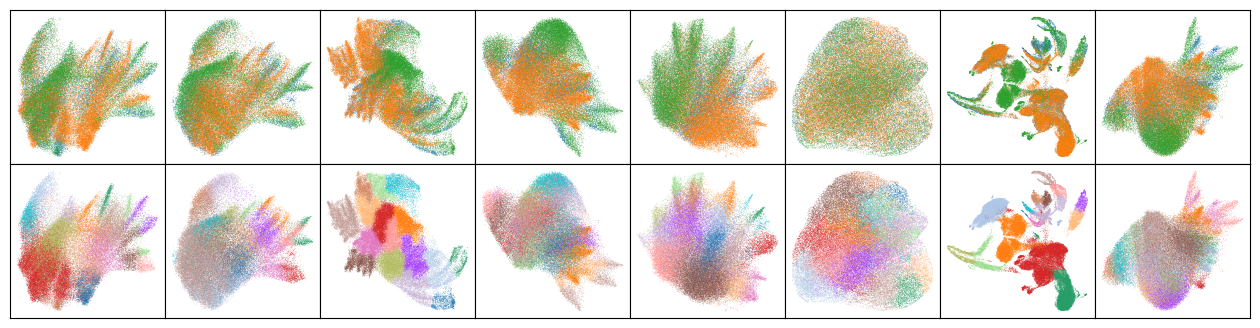

In [443]:
fig, ax = plt.subplots(2, 8, figsize=(16,4))
for adata,i in zip(method_list,ax[0].flatten()):
    if adata=="BBKNN":
        title=adata
    else:
        title=adata.capitalize()
    sc.pl.umap(data[adata],color="batch",ax=i,show=False,s=0.5,title="")
    i.set_xlabel("")
    i.set_ylabel("")
    i.get_legend().remove()
for adata,i in zip(method_list,ax[1].flatten()):
    if adata=="BBKNN":
        title=adata
    else:
        title=adata.capitalize()
    sc.pl.umap(data[adata],color="hclust_16",ax=i,show=False,s=0.5,title="")
    i.set_xlabel("")
    i.set_ylabel("")
    i.get_legend().remove()
    
fig.subplots_adjust(wspace=0, hspace=0)   
plt.savefig("./figure/supplement_umap_figb.png", dpi=900, bbox_inches="tight")

In [405]:
adata0

AnnData object with n_obs × n_vars = 17428 × 11376
    obs: 'n_genes', 'x', 'y', 'batch', 'leiden', 'hclust_16', 'hipp'
    var: 'n_cells-0', 'n_cells-1', 'n_cells-2', 'hippocampus_data.counts...1.-2'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'batch_colors', 'leiden_colors', 'hclust_16_colors', 'hipp_colors'
    obsm: 'spatial', 'X_pca', 'X_umap', 'X_umap_knn_connectivity', 'X_umap_knn_distances'
    obsp: 'distances', 'connectivities'

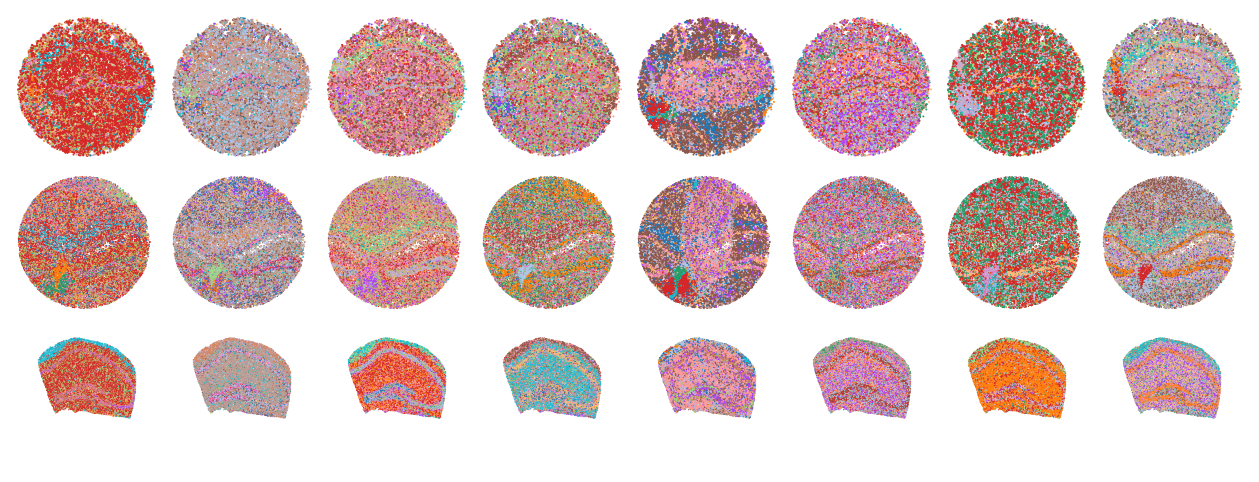

In [406]:
fig, ax = plt.subplots(3, 8, figsize=(16,6))

for method,i in zip(method_list,ax[0].flatten()):
    adata=data[method]

    adata0=adata[adata.obs.batch=="0"].copy()
    adata0.obsm["spatial"]=rotation_pos(adata0.obsm["spatial"].T, 30).T
    adata0.obsm["spatial"][:,1]=-adata0.obsm["spatial"][:,1]
    adata0=get_cricle_data(adata0,circle_0)
    sc.pl.spatial(adata0,color="hclust_16",ax=i,title="",show=False,spot_size=70)
    i.set_xlabel("")
    i.set_ylabel("")
    i.get_legend().remove()
    i.spines["right"].set_visible(False)
    i.spines["left"].set_visible(False)
    i.spines["top"].set_visible(False)
    i.spines["bottom"].set_visible(False)
    # i.set_xlim((i.get_xlim()[0]*scale+500,i.get_xlim()[1]*scale+400))
    # i.set_ylim((i.get_ylim()[0]*scale-850,i.get_ylim()[1]*scale-850))
    # i.get_xticks().show()
for method,i in zip(method_list,ax[1].flatten()):
    scale=1.05
    adata=data[method]

    adata1=adata[adata.obs.batch=="1"].copy()
    adata1.obsm["spatial"]=rotation_pos(adata1.obsm["spatial"].T, -60).T
    adata1=get_cricle_data(adata1,circle_1)
    sc.pl.spatial(adata1,color="hclust_16",ax=i,title="",show=False,spot_size=50)
    
    i.set_xlabel("")
    i.set_ylabel("")
    i.get_legend().remove()
    i.spines["right"].set_visible(False)
    i.spines["left"].set_visible(False)
    i.spines["top"].set_visible(False)
    i.spines["bottom"].set_visible(False)
    i.set_xlim((i.get_xlim()[0]*scale-110,i.get_xlim()[1]*scale-110))
    i.set_ylim((i.get_ylim()[0]*scale,i.get_ylim()[1]*scale))
for method,i in zip(method_list,ax[2].flatten()):
    adata=data[method]
    scale=1.3
    adata2=adata[adata.obs.batch=="2"].copy()
    adata2.obsm["spatial"]=rotation_pos(adata2.obsm["spatial"].T, 30).T
    adata2.obsm["spatial"]=scale_pos(adata2.obsm["spatial"].T, scale_y=0.5,scale_x=0.3).T
    sc.pl.spatial(adata2,color="hclust_16",ax=i,title="",show=False,spot_size=15)
    # i.margins(x=0.25,y=0.25)
    i.set_xlabel("")
    i.set_ylabel("")
    i.get_legend().remove()
    i.spines["right"].set_visible(False)
    i.spines["left"].set_visible(False)
    i.spines["top"].set_visible(False)
    i.spines["bottom"].set_visible(False)
    # i.set_xlim((i.get_xlim()[0]*scale-i.get_xlim()[0],i.get_xlim()[1]*scale-i.get_xlim()[1]))
    # i.set_ylim((i.get_ylim()[0]*scale-i.get_ylim()[0]+800,i.get_ylim()[1]*scale-i.get_ylim()[0]+800))
    i.set_ylim((i.get_ylim()[0]*scale-200,i.get_ylim()[1]-200))
fig.subplots_adjust(wspace=0, hspace=0)
# plt.show()
plt.savefig("./figure/supplement_figb.png", dpi=900, bbox_inches="tight")

categories: 0, 1, 2, etc.
var_group_labels: CA1, CA3, DG
categories: 0, 1, 2, etc.
var_group_labels: CA1, CA3, DG
categories: 0, 1, 2, etc.
var_group_labels: CA1, CA3, DG
categories: 0, 1, 2, etc.
var_group_labels: CA1, CA3, DG
categories: 0, 1, 2, etc.
var_group_labels: CA1, CA3, DG
categories: 0, 1, 2, etc.
var_group_labels: CA1, CA3, DG
categories: 0, 1, 2, etc.
var_group_labels: CA1, CA3, DG
categories: 0, 1, 2, etc.
var_group_labels: CA1, CA3, DG


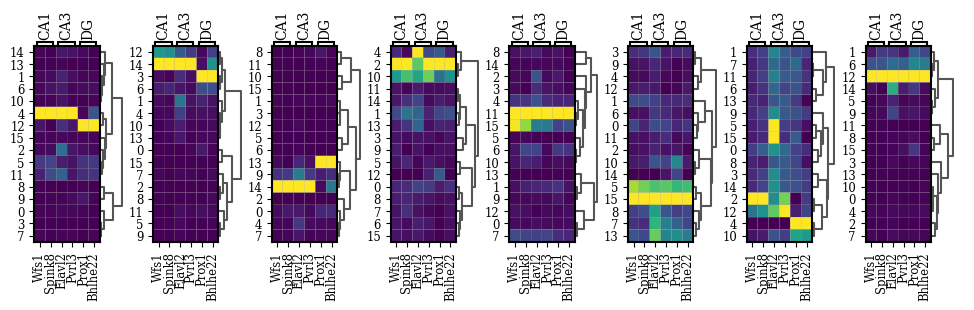

In [425]:
marker_dir={"CA1":["Wfs1","Spink8"],
            "CA3":["Elavl2","Pvrl3"],
            "DG":["Prox1","Bhlhe22"]}

fig, axs = plt.subplots(1, 8, figsize=(12,3))
for method,i in zip(method_list,axs.flatten()):
    if method=="BBKNN":
        title=method
    else:
        title=method.capitalize()
    sm=sc.pl.MatrixPlot(data[method], marker_dir, groupby='hclust_16',standard_scale="var",ax=i,var_group_rotation=90)
    sm.add_dendrogram()
    sm.legend(show=False)
    sm.make_figure()
    
    # sm.legend()
    
plt.savefig("./figure/supplement_figure2_dotplot.png", dpi=900, bbox_inches="tight")
    
    

In [340]:
hipp_label_dir={"harmony":["4","12"],"combat":["14","3"],"BBKNN":["13","14"],"scanorama":["10","2"],
           "graphST":["11","15"],"scalex":["15","5"],"precast":["4","10","12","2"],"mnn":["12","6"]}
for method in method_list:
    data[method].obs["hipp"]="others"
    data[method].obs.loc[data[method].obs.hclust_16.isin(hipp_label_dir[method]),"hipp"]="hipp_cell"

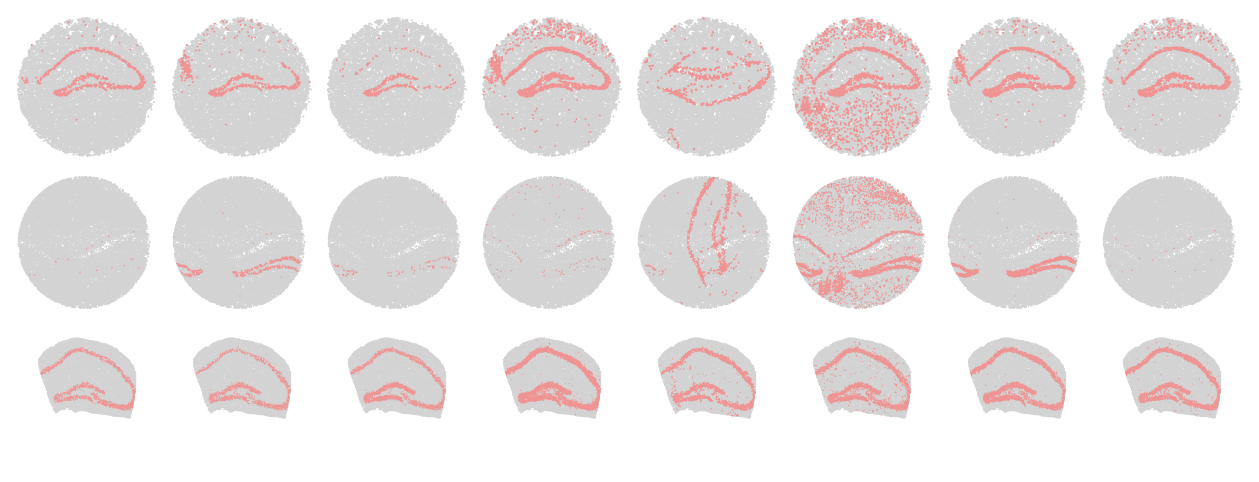

In [403]:
fig, ax = plt.subplots(3, 8, figsize=(16,6))

for method,i in zip(method_list,ax[0].flatten()):
    adata=data[method]

    adata0=adata[adata.obs.batch=="0"].copy()
    adata0.obsm["spatial"]=rotation_pos(adata0.obsm["spatial"].T, 30).T
    adata0.obsm["spatial"][:,1]=-adata0.obsm["spatial"][:,1]
    adata0=get_cricle_data(adata0,circle_0)
    sc.pl.spatial(adata0,color="hipp",groups="hipp_cell",ax=i,title="",show=False,spot_size=70)
    i.set_xlabel("")
    i.set_ylabel("")
    i.get_legend().remove()
    i.spines["right"].set_visible(False)
    i.spines["left"].set_visible(False)
    i.spines["top"].set_visible(False)
    i.spines["bottom"].set_visible(False)
    # i.set_xlim((i.get_xlim()[0]*scale+500,i.get_xlim()[1]*scale+400))
    # i.set_ylim((i.get_ylim()[0]*scale-850,i.get_ylim()[1]*scale-850))
    # i.get_xticks().show()
for method,i in zip(method_list,ax[1].flatten()):
    scale=1.05
    adata=data[method]

    adata1=adata[adata.obs.batch=="1"].copy()
    adata1.obsm["spatial"]=rotation_pos(adata1.obsm["spatial"].T, -60).T
    adata1=get_cricle_data(adata1,circle_1)
    sc.pl.spatial(adata1,color="hipp",groups="hipp_cell",ax=i,title="",show=False,spot_size=50)
    
    i.set_xlabel("")
    i.set_ylabel("")
    i.get_legend().remove()
    i.spines["right"].set_visible(False)
    i.spines["left"].set_visible(False)
    i.spines["top"].set_visible(False)
    i.spines["bottom"].set_visible(False)
    i.set_xlim((i.get_xlim()[0]*scale-110,i.get_xlim()[1]*scale-110))
    i.set_ylim((i.get_ylim()[0]*scale,i.get_ylim()[1]*scale))
for method,i in zip(method_list,ax[2].flatten()):
    adata=data[method]
    scale=1.3
    adata2=adata[adata.obs.batch=="2"].copy()
    adata2.obsm["spatial"]=rotation_pos(adata2.obsm["spatial"].T, 30).T
    adata2.obsm["spatial"]=scale_pos(adata2.obsm["spatial"].T, scale_y=0.5,scale_x=0.3).T
    sc.pl.spatial(adata2,color="hipp",groups="hipp_cell",ax=i,title="",show=False,spot_size=15)
    # i.margins(x=0.25,y=0.25)
    i.set_xlabel("")
    i.set_ylabel("")
    i.get_legend().remove()
    i.spines["right"].set_visible(False)
    i.spines["left"].set_visible(False)
    i.spines["top"].set_visible(False)
    i.spines["bottom"].set_visible(False)
    # i.set_xlim((i.get_xlim()[0]*scale-i.get_xlim()[0],i.get_xlim()[1]*scale-i.get_xlim()[1]))
    # i.set_ylim((i.get_ylim()[0]*scale-i.get_ylim()[0]+800,i.get_ylim()[1]*scale-i.get_ylim()[0]+800))
    i.set_ylim((i.get_ylim()[0]*scale-200,i.get_ylim()[1]-200))
fig.subplots_adjust(wspace=0, hspace=0)
# plt.show()
plt.savefig("./figure/supplement_hipp_figb.png", dpi=900, bbox_inches="tight")

In [392]:
i.get_ylim()

(2813.705076659095, 2956.322076889911)

In [235]:
fig, ax = plt.subplots(3, 8, figsize=(16,6))

for method,i in zip(method_list,ax[0].flatten()):
    adata=data[method]
    scale=0.85
    adata0=adata[adata.obs.batch=="0"].copy()
    adata0.obsm["spatial"]=rotation_pos(adata0.obsm["spatial"].T, 30).T
    adata0.obsm["spatial"][:,1]=-adata0.obsm["spatial"][:,1]
    sc.pl.spatial(adata0,color="hipp",groups="hipp_cell",ax=i,title="",show=False,spot_size=70)
    i.set_xlabel("")
    i.set_ylabel("")
    i.get_legend().remove()
    i.spines["right"].set_visible(False)
    i.spines["left"].set_visible(False)
    i.spines["top"].set_visible(False)
    i.spines["bottom"].set_visible(False)
    i.set_xlim((i.get_xlim()[0]*scale+500,i.get_xlim()[1]*scale+400))
    i.set_ylim((i.get_ylim()[0]*scale-850,i.get_ylim()[1]*scale-850))
    # i.get_xticks().show()
for method,i in zip(method_list,ax[1].flatten()):
    adata=data[method]
    scale=0.75
    adata1=adata[adata.obs.batch=="1"].copy()
    adata1.obsm["spatial"]=rotation_pos(adata1.obsm["spatial"].T, -60).T
    sc.pl.spatial(adata1,color="hipp",groups="hipp_cell",ax=i,title="",show=False,spot_size=50)
    # i.margins(x=-0.3,y=-0.3)
    i.set_xlabel("")
    i.set_ylabel("")
    i.get_legend().remove()
    i.spines["right"].set_visible(False)
    i.spines["left"].set_visible(False)
    i.spines["top"].set_visible(False)
    i.spines["bottom"].set_visible(False)
    i.set_xlim((i.get_xlim()[0]*scale+1200,i.get_xlim()[1]*scale+1200))
    i.set_ylim((i.get_ylim()[0]*scale-500,i.get_ylim()[1]*scale-500))
for method,i in zip(method_list,ax[2].flatten()):
    adata=data[method]
    scale=2
    adata2=adata[adata.obs.batch=="2"].copy()
    adata2.obsm["spatial"]=rotation_pos(adata2.obsm["spatial"].T, 30).T
    adata2.obsm["spatial"]=scale_pos(adata2.obsm["spatial"].T, scale_y=0.5,scale_x=0.3).T
    sc.pl.spatial(adata2,color="hipp",groups="hipp_cell",ax=i,title="",show=False,spot_size=15)
    # i.margins(x=0.25,y=0.25)
    i.set_xlabel("")
    i.set_ylabel("")
    i.get_legend().remove()
    i.spines["right"].set_visible(False)
    i.spines["left"].set_visible(False)
    i.spines["top"].set_visible(False)
    i.spines["bottom"].set_visible(False)
    i.set_xlim((i.get_xlim()[0]*scale-i.get_xlim()[0],i.get_xlim()[1]*scale-i.get_xlim()[1]))
    i.set_ylim((i.get_ylim()[0]*scale-i.get_ylim()[0]+800,i.get_ylim()[1]*scale-i.get_ylim()[0]+800))
fig.subplots_adjust(wspace=0, hspace=0)
# plt.show()
plt.savefig("./figure/supplement_hipp_figb.png", dpi=900, bbox_inches="tight")

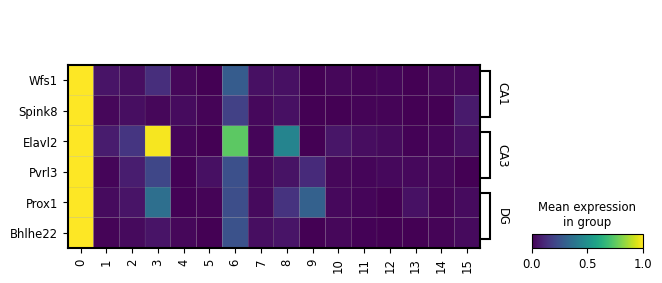

In [264]:
marker_dir={"CA1":["Wfs1","Spink8"],
            "CA3":["Elavl2","Pvrl3"],
            "DG":["Prox1","Bhlhe22"]}
sc.pl.matrixplot(raw_adata0, marker_dir, groupby='hclust_16',standard_scale="var",save="heatmap.pdf",swap_axes=True)
sc.pl.matrixplot(raw_adata1, marker_dir, groupby='hclust_16',standard_scale="var",save="heatmap.pdf",swap_axes=True)
sc.pl.matrixplot(raw_adata2, marker_dir, groupby='hclust_16',standard_scale="var",save="heatmap.pdf",swap_axes=True)

In [302]:
from geopandas import GeoDataFrame,points_from_xy
import geopandas
from esda.moran import Moran
from pysal.lib import weights
# raw_adata0.obs
# adata=raw_adata0

In [310]:
gpd_df=pd.DataFrame({"x":adata.obsm["spatial"][:,0],"y":adata.obsm["spatial"][:,1],"lebel":adata.obs.hclust_16.tolist()})
gpd_df=pd.get_dummies(gpd_df)
gdf=GeoDataFrame(gpd_df,geometry=points_from_xy(gpd_df.x,gpd_df.y))

In [313]:
w=weights.Queen.from_dataframe(gdf)
moran=Moran(gdf.lebel_0,w)

In [466]:
import esda

In [365]:
moran_df=pd.DataFrame(columns=["name","Moran"])

for i in data.keys():
    temp_dic={}
    temp_dic["name"]=i
    mor_list=[]
    adata=data[i]
    for k in range(3):
        temp_adata=adata[adata.obs.batch==str(k)]
        gpd_df=pd.DataFrame({"x":temp_adata.obsm["spatial"][:,0],"y":temp_adata.obsm["spatial"][:,1],"lebel":temp_adata.obs.hclust_16.tolist()})
        gpd_df=pd.get_dummies(gpd_df)
        gdf=GeoDataFrame(gpd_df,geometry=points_from_xy(gpd_df.x,gpd_df.y))
        w=weights.Queen.from_dataframe(gdf)
        for j in range(16):
            lebel_name="lebel_"+str(j)
            if lebel_name in gdf.columns.tolist():
                
                moran=Moran(gdf[lebel_name],w)
                mor_list.append(moran.I)
    temp_dic["Moran"]=mor_list
    
    moran_df=pd.concat([moran_df,pd.DataFrame(temp_dic)])

In [413]:
moran_df.to_csv("./data/moran.csv")

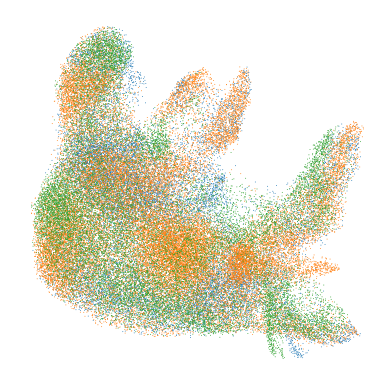

In [410]:
spatialign_merge=data["spatialign"]
fig, a = plt.subplots(1, 1, figsize=(4,4))

sc.pl.umap(spatialign_merge,color=["batch"],ax=a, show=False)
# sc.pl.umap(spatialign_merge,color=["hclust_16"],ax=ax[1], show=False)

# ax[0].legend(loc='lower right',frameon=False,labelspacing=0.2, handlelength=0.1, handletextpad=0.5)
# ax[1].legend(loc='upper right',frameon=False,labelspacing=0.2, handlelength=0.1, handletextpad=0.5)
# ax[2].get_legend().remove()

a.set_xlabel("")
a.set_ylabel("")
a.get_legend().remove()
a.set_title("")
a.spines["right"].set_color("none")
a.spines["left"].set_color("none")
a.spines["top"].set_color("none")
a.spines["bottom"].set_color("none")
# fig.set_size_inches(8.27,2)
fig.subplots_adjust(wspace=0, hspace=0)
# plt.show()
plt.savefig("./figure/figureb_cluster_v2.png", dpi=900, bbox_inches="tight")

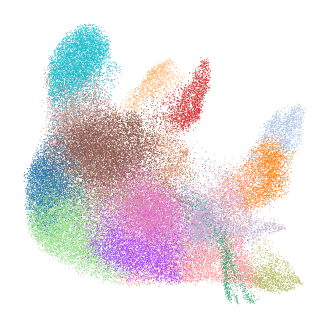

In [332]:
fig, a = plt.subplots(1, 1, figsize=(4,4))

sc.pl.umap(spatialign_merge,color=["hclust_16"],ax=a, show=False)
# sc.pl.umap(spatialign_merge,color=["hclust_16"],ax=ax[1], show=False)

# ax[0].legend(loc='lower right',frameon=False,labelspacing=0.2, handlelength=0.1, handletextpad=0.5)
# ax[1].legend(loc='upper right',frameon=False,labelspacing=0.2, handlelength=0.1, handletextpad=0.5)
# ax[2].get_legend().remove()

a.set_xlabel("")
a.set_ylabel("")
a.get_legend().remove()
a.set_title("")
a.spines["right"].set_color("none")
a.spines["left"].set_color("none")
a.spines["top"].set_color("none")
a.spines["bottom"].set_color("none")
# fig.set_size_inches(8.27,2)
fig.subplots_adjust(wspace=0, hspace=0)
# plt.show()
plt.savefig("./figure/figureb_cluster_v2_hclust.png", dpi=900, bbox_inches="tight")

In [6]:
# spatialign_merge.obs["hipp"]="others"
# spatialign_merge.obs.loc[spatialign_merge.obs.hclust_16=="7","hipp"]="CA1"
# spatialign_merge.obs.loc[spatialign_merge.obs.hclust_16=="14","hipp"]="CA3"
# spatialign_merge.obs.loc[spatialign_merge.obs.hclust_16=="9","hipp"]="DG"
# spatialign_merge.obs.loc[spatialign_merge.obs.hclust_16=="1","hipp"]="DG"
spatialign_data0=spatialign_merge[spatialign_merge.obs.batch=="0"].copy()
spatialign_data0.obsm["spatial"]=rotation_pos(spatialign_data0.obsm["spatial"].T, 30).T
spatialign_data0.obsm["spatial"][:,1]=-spatialign_data0.obsm["spatial"][:,1]
spatialign_data0=get_cricle_data(spatialign_data0,circle_0)
spatialign_data1=spatialign_merge[spatialign_merge.obs.batch=="1"].copy()
spatialign_data1.obsm["spatial"]=rotation_pos(spatialign_data1.obsm["spatial"].T, -60).T
spatialign_data1=get_cricle_data(spatialign_data1,circle_1)
spatialign_data2=spatialign_merge[spatialign_merge.obs.batch=="2"].copy()

spatialign_data2.obsm["spatial"]=rotation_pos(spatialign_data2.obsm["spatial"].T, 30).T
spatialign_data2.obsm["spatial"]=scale_pos(spatialign_data2.obsm["spatial"].T, scale_y=0.5,scale_x=0.3).T

In [18]:
spatialign_data0.var["temp"]="1"
spatialign_data1.var["temp"]="1"
spatialign_data2.var["temp"]="1"

In [19]:
adata=spatialign_data0.concatenate(spatialign_data1, spatialign_data2)
adata.write_h5ad("./data/spatialign_merge_for_figure_clean.h5ad")

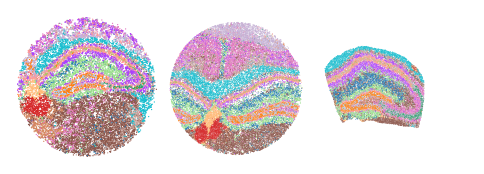

In [407]:

fig, ax = plt.subplots(1, 3, figsize=(6, 2))

sc.pl.spatial(spatialign_data0, color="hclust_16",spot_size=45,ax=ax[0], title="", show=False)
i=ax[0]
i.set_xlabel("")
i.set_ylabel("")
i.get_legend().remove()
i.spines["right"].set_visible(False)
i.spines["left"].set_visible(False)
i.spines["top"].set_visible(False)
i.spines["bottom"].set_visible(False)

scale=1.05
sc.pl.spatial(spatialign_data1, color="hclust_16",spot_size=30,ax=ax[1], title="", show=False)
i=ax[1]
i.set_xlabel("")
i.set_ylabel("")
i.get_legend().remove()
i.spines["right"].set_visible(False)
i.spines["left"].set_visible(False)
i.spines["top"].set_visible(False)
i.spines["bottom"].set_visible(False)
i.set_xlim((i.get_xlim()[0]*scale,i.get_xlim()[1]*scale))
i.set_ylim((i.get_ylim()[0]*scale,i.get_ylim()[1]*scale))

scale=1.5
axs=sc.pl.spatial(spatialign_data2, color="hclust_16",spot_size=10, ax=ax[2],title="", show=False,basis="spatial")
i=axs[0]
i.set_xlabel("")
i.set_ylabel("")
i.get_legend().remove()
i.spines["right"].set_visible(False)
i.spines["left"].set_visible(False)
i.spines["top"].set_visible(False)
i.spines["bottom"].set_visible(False)
# i.set_xlim((i.get_xlim()[0]*scale-i.get_xlim()[0]+30,i.get_xlim()[1]*scale-i.get_xlim()[1]+30))
# i.set_ylim((i.get_ylim()[0]*scale-i.get_ylim()[0]+500,i.get_ylim()[1]*scale-i.get_ylim()[0]+500))
i.set_xlim((i.get_xlim()[0],i.get_xlim()[1]*scale))
fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig("./figure/fig_hclust_16.png",dpi=900, bbox_inches="tight")

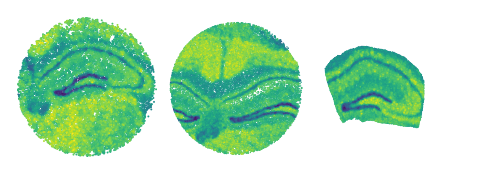

In [436]:
spatialign_data0.obs["UMI"]=spatialign_data0.X.sum(axis=1)
spatialign_data1.obs["UMI"]=spatialign_data1.X.sum(axis=1)
spatialign_data2.obs["UMI"]=spatialign_data2.X.sum(axis=1)

fig, ax = plt.subplots(1, 3, figsize=(6, 2))

sc.pl.spatial(spatialign_data0, color="UMI",spot_size=70,ax=ax[0], title="", show=False,colorbar_loc=None)
i=ax[0]
i.set_xlabel("")
i.set_ylabel("")
i.spines["right"].set_visible(False)
i.spines["left"].set_visible(False)
i.spines["top"].set_visible(False)
i.spines["bottom"].set_visible(False)

scale=1.05
sc.pl.spatial(spatialign_data1, color="UMI",spot_size=50,ax=ax[1], title="", show=False,colorbar_loc=None)
i=ax[1]
i.set_xlabel("")
i.set_ylabel("")
i.spines["right"].set_visible(False)
i.spines["left"].set_visible(False)
i.spines["top"].set_visible(False)
i.spines["bottom"].set_visible(False)
i.set_xlim((i.get_xlim()[0]*scale,i.get_xlim()[1]*scale))
i.set_ylim((i.get_ylim()[0]*scale,i.get_ylim()[1]*scale))

scale=1.5
axs=sc.pl.spatial(spatialign_data2, color="UMI",spot_size=20, ax=ax[2],title="", show=False,basis="spatial",colorbar_loc=None)
i=axs[0]
i.set_xlabel("")
i.set_ylabel("")
i.spines["right"].set_visible(False)
i.spines["left"].set_visible(False)
i.spines["top"].set_visible(False)
i.spines["bottom"].set_visible(False)
# i.set_xlim((i.get_xlim()[0]*scale-i.get_xlim()[0]+30,i.get_xlim()[1]*scale-i.get_xlim()[1]+30))
# i.set_ylim((i.get_ylim()[0]*scale-i.get_ylim()[0]+500,i.get_ylim()[1]*scale-i.get_ylim()[0]+500))
i.set_xlim((i.get_xlim()[0],i.get_xlim()[1]*scale))
fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig("./figure/fig_UMI.png",dpi=900, bbox_inches="tight")

In [431]:
spatialign_data0.X.sum(axis=1).shape

(17428,)

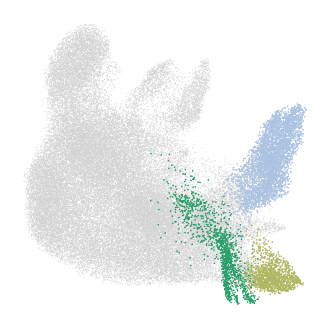

In [337]:
fig, a = plt.subplots(1, 1, figsize=(4,4))

sc.pl.umap(spatialign_merge,color=["hclust_16"],groups=["7","9","14"],ax=a, show=False)
sc.pl.umap(spatialign_merge[spatialign_merge.obs.hclust_16.isin(["1","7","9","14"])],color=["hipp"],ax=a, show=False,s=5,palette={"DG": "#abc3e2","CA1":"#b0b761","CA3":"#279e68"})
# sc.pl.umap(spatialign_merge,color=["hclust_16"],ax=ax[1], show=False)

# ax[0].legend(loc='lower right',frameon=False,labelspacing=0.2, handlelength=0.1, handletextpad=0.5)
# ax[1].legend(loc='upper right',frameon=False,labelspacing=0.2, handlelength=0.1, handletextpad=0.5)
# ax[2].get_legend().remove()

a.set_xlabel("")
a.set_ylabel("")
a.get_legend().remove()
a.set_title("")
a.spines["right"].set_color("none")
a.spines["left"].set_color("none")
a.spines["top"].set_color("none")
a.spines["bottom"].set_color("none")
# fig.set_size_inches(8.27,2)
fig.subplots_adjust(wspace=0, hspace=0)
# plt.show()
plt.savefig("./figure/figureb_v2_hclust_hipp.png", dpi=900, bbox_inches="tight")

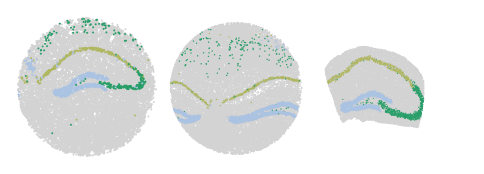

In [409]:
fig, ax = plt.subplots(1, 3, figsize=(6, 2))

sc.pl.spatial(spatialign_data0, color="hipp",spot_size=70,groups=["CA1","CA3","DG"],ax=ax[0], title="", show=False,palette={"DG": "#abc3e2","CA1":"#b0b761","CA3":"#279e68","others":"#279e68"})
i=ax[0]
i.set_xlabel("")
i.set_ylabel("")
i.get_legend().remove()
i.spines["right"].set_visible(False)
i.spines["left"].set_visible(False)
i.spines["top"].set_visible(False)
i.spines["bottom"].set_visible(False)

scale=1.05
sc.pl.spatial(spatialign_data1, color="hipp",groups=["CA1","CA3","DG"],spot_size=50,ax=ax[1], title="", show=False,palette={"DG": "#abc3e2","CA1":"#b0b761","CA3":"#279e68","others":"#279e68"})
i=ax[1]
i.set_xlabel("")
i.set_ylabel("")
i.get_legend().remove()
i.spines["right"].set_visible(False)
i.spines["left"].set_visible(False)
i.spines["top"].set_visible(False)
i.spines["bottom"].set_visible(False)
i.set_xlim((i.get_xlim()[0]*scale,i.get_xlim()[1]*scale))
i.set_ylim((i.get_ylim()[0]*scale,i.get_ylim()[1]*scale))

scale=1.5
axs=sc.pl.spatial(spatialign_data2, color="hipp",groups=["CA1","CA3","DG"],spot_size=15, ax=ax[2],title="", show=False,basis="spatial",palette={"DG": "#abc3e2","CA1":"#b0b761","CA3":"#279e68","others":"#279e68"})
i=axs[0]
i.set_xlabel("")
i.set_ylabel("")
i.get_legend().remove()
i.spines["right"].set_visible(False)
i.spines["left"].set_visible(False)
i.spines["top"].set_visible(False)
i.spines["bottom"].set_visible(False)
# i.set_xlim((i.get_xlim()[0]*scale-i.get_xlim()[0]+30,i.get_xlim()[1]*scale-i.get_xlim()[1]+30))
# i.set_ylim((i.get_ylim()[0]*scale-i.get_ylim()[0]+500,i.get_ylim()[1]*scale-i.get_ylim()[0]+500))
i.set_xlim((i.get_xlim()[0],i.get_xlim()[1]*scale))
fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig("./figure/fig_hclust_hipp.png",dpi=900, bbox_inches="tight")

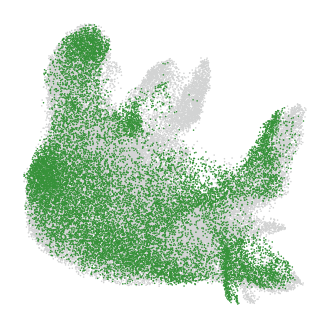

In [439]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
# sc.pl.umap(spatialign_merge,color=["hclust_16"],ax=ax,groups=["3","10"], show=False)
sc.pl.umap(spatialign_merge,color=["batch"],s=5,palette={"2": "#369239","1":"#d2d3d3","0":"#d2d3d3"},ax=ax,show=False)
# sc.pl.umap(spatialign_merge[spatialign_merge.obs.hclust_16.isin(["3","10"])],color=["hclust_16"],ax=ax[1],groups=["3","10"], show=False,s=5)
# ax[0].legend(loc='lower right',frameon=False,labelspacing=0.2, handlelength=0.1, handletextpad=0.5)
# ax[1].legend(loc='upper right',frameon=False,labelspacing=0.2, handlelength=0.1, handletextpad=0.5)
# ax[2].get_legend().remove()
a =ax
a.set_xlabel("")
a.set_ylabel("")
a.get_legend().remove()
a.set_title("")
a.spines["right"].set_color("none")
a.spines["left"].set_color("none")
a.spines["top"].set_color("none")
a.spines["bottom"].set_color("none")
# fig.set_size_inches(8.27,2)
fig.subplots_adjust(wspace=0, hspace=0)
# plt.show()
plt.savefig("./figure/figureb_cluster.png", dpi=900, bbox_inches="tight")

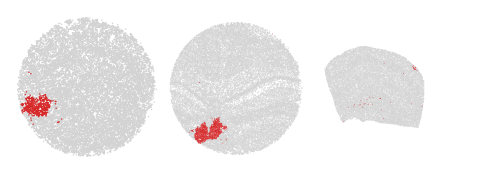

In [416]:

fig, ax = plt.subplots(1, 3, figsize=(6, 2))

sc.pl.spatial(spatialign_data0, color="hclust_16",groups=["3"],spot_size=50,ax=ax[0], title="", show=False)
i=ax[0]
i.set_xlabel("")
i.set_ylabel("")
i.get_legend().remove()
i.spines["right"].set_visible(False)
i.spines["left"].set_visible(False)
i.spines["top"].set_visible(False)
i.spines["bottom"].set_visible(False)

scale=1.05
sc.pl.spatial(spatialign_data1, color="hclust_16",groups=["3"],spot_size=30,ax=ax[1], title="", show=False)
i=ax[1]
i.set_xlabel("")
i.set_ylabel("")
i.get_legend().remove()
i.spines["right"].set_visible(False)
i.spines["left"].set_visible(False)
i.spines["top"].set_visible(False)
i.spines["bottom"].set_visible(False)
i.set_xlim((i.get_xlim()[0]*scale,i.get_xlim()[1]*scale))
i.set_ylim((i.get_ylim()[0]*scale,i.get_ylim()[1]*scale))

scale=1.5
axs=sc.pl.spatial(spatialign_data2, color="hclust_16",groups=["3"],spot_size=10, ax=ax[2],title="", show=False,basis="spatial")
i=axs[0]
i.set_xlabel("")
i.set_ylabel("")
i.get_legend().remove()
i.spines["right"].set_visible(False)
i.spines["left"].set_visible(False)
i.spines["top"].set_visible(False)
i.spines["bottom"].set_visible(False)
# i.set_xlim((i.get_xlim()[0]*scale-i.get_xlim()[0]+30,i.get_xlim()[1]*scale-i.get_xlim()[1]+30))
# i.set_ylim((i.get_ylim()[0]*scale-i.get_ylim()[0]+500,i.get_ylim()[1]*scale-i.get_ylim()[0]+500))
i.set_xlim((i.get_xlim()[0],i.get_xlim()[1]*scale))
fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig("./figure/fig_hclust_16_3.png",dpi=900, bbox_inches="tight")

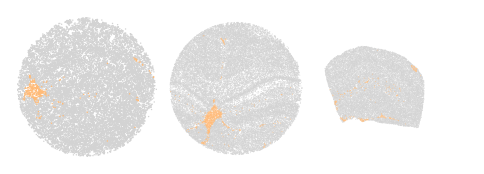

In [415]:

fig, ax = plt.subplots(1, 3, figsize=(6, 2))

sc.pl.spatial(spatialign_data0, color="hclust_16",groups=["10"],spot_size=50,ax=ax[0], title="", show=False)
i=ax[0]
i.set_xlabel("")
i.set_ylabel("")
i.get_legend().remove()
i.spines["right"].set_visible(False)
i.spines["left"].set_visible(False)
i.spines["top"].set_visible(False)
i.spines["bottom"].set_visible(False)

scale=1.05
sc.pl.spatial(spatialign_data1, color="hclust_16",groups=["10"],spot_size=30,ax=ax[1], title="", show=False)
i=ax[1]
i.set_xlabel("")
i.set_ylabel("")
i.get_legend().remove()
i.spines["right"].set_visible(False)
i.spines["left"].set_visible(False)
i.spines["top"].set_visible(False)
i.spines["bottom"].set_visible(False)
i.set_xlim((i.get_xlim()[0]*scale,i.get_xlim()[1]*scale))
i.set_ylim((i.get_ylim()[0]*scale,i.get_ylim()[1]*scale))

scale=1.5
axs=sc.pl.spatial(spatialign_data2, color="hclust_16",groups=["10"],spot_size=10, ax=ax[2],title="", show=False,basis="spatial")
i=axs[0]
i.set_xlabel("")
i.set_ylabel("")
i.get_legend().remove()
i.spines["right"].set_visible(False)
i.spines["left"].set_visible(False)
i.spines["top"].set_visible(False)
i.spines["bottom"].set_visible(False)
# i.set_xlim((i.get_xlim()[0]*scale-i.get_xlim()[0]+30,i.get_xlim()[1]*scale-i.get_xlim()[1]+30))
# i.set_ylim((i.get_ylim()[0]*scale-i.get_ylim()[0]+500,i.get_ylim()[1]*scale-i.get_ylim()[0]+500))
i.set_xlim((i.get_xlim()[0],i.get_xlim()[1]*scale))
fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig("./figure/fig_hclust_16_10.png",dpi=900, bbox_inches="tight")

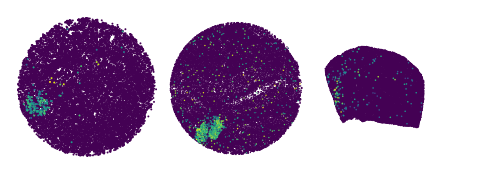

In [421]:

fig, ax = plt.subplots(1, 3, figsize=(6, 2))

sc.pl.spatial(spatialign_data0, color="Tac2",spot_size=70,ax=ax[0], title="", show=False,colorbar_loc=None)
i=ax[0]
i.set_xlabel("")
i.set_ylabel("")
i.spines["right"].set_visible(False)
i.spines["left"].set_visible(False)
i.spines["top"].set_visible(False)
i.spines["bottom"].set_visible(False)

scale=1.05
sc.pl.spatial(spatialign_data1, color="Tac2",spot_size=50,ax=ax[1], title="", show=False,colorbar_loc=None)
i=ax[1]
i.set_xlabel("")
i.set_ylabel("")
i.spines["right"].set_visible(False)
i.spines["left"].set_visible(False)
i.spines["top"].set_visible(False)
i.spines["bottom"].set_visible(False)
i.set_xlim((i.get_xlim()[0]*scale,i.get_xlim()[1]*scale))
i.set_ylim((i.get_ylim()[0]*scale,i.get_ylim()[1]*scale))

scale=1.5
axs=sc.pl.spatial(spatialign_data2, color="Tac2",spot_size=20, ax=ax[2],title="", show=False,basis="spatial",colorbar_loc=None)
i=axs[0]
i.set_xlabel("")
i.set_ylabel("")
i.spines["right"].set_visible(False)
i.spines["left"].set_visible(False)
i.spines["top"].set_visible(False)
i.spines["bottom"].set_visible(False)
# i.set_xlim((i.get_xlim()[0]*scale-i.get_xlim()[0]+30,i.get_xlim()[1]*scale-i.get_xlim()[1]+30))
# i.set_ylim((i.get_ylim()[0]*scale-i.get_ylim()[0]+500,i.get_ylim()[1]*scale-i.get_ylim()[0]+500))
i.set_xlim((i.get_xlim()[0],i.get_xlim()[1]*scale))
fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig("./figure/fig_hclust_16_tac2.png",dpi=900, bbox_inches="tight")

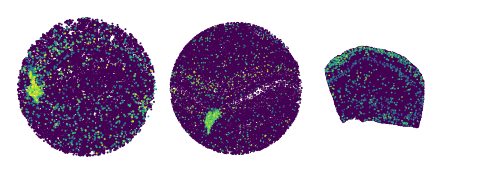

In [423]:

fig, ax = plt.subplots(1, 3, figsize=(6, 2))

sc.pl.spatial(spatialign_data0, color="Enpp2",spot_size=70,ax=ax[0], title="", show=False,colorbar_loc=None)
i=ax[0]
i.set_xlabel("")
i.set_ylabel("")
i.spines["right"].set_visible(False)
i.spines["left"].set_visible(False)
i.spines["top"].set_visible(False)
i.spines["bottom"].set_visible(False)

scale=1.05
sc.pl.spatial(spatialign_data1, color="Enpp2",spot_size=50,ax=ax[1], title="", show=False,colorbar_loc=None)
i=ax[1]
i.set_xlabel("")
i.set_ylabel("")
i.spines["right"].set_visible(False)
i.spines["left"].set_visible(False)
i.spines["top"].set_visible(False)
i.spines["bottom"].set_visible(False)
i.set_xlim((i.get_xlim()[0]*scale,i.get_xlim()[1]*scale))
i.set_ylim((i.get_ylim()[0]*scale,i.get_ylim()[1]*scale))

scale=1.5
axs=sc.pl.spatial(spatialign_data2, color="Enpp2",spot_size=20, ax=ax[2],title="", show=False,basis="spatial",colorbar_loc=None)
i=axs[0]
i.set_xlabel("")
i.set_ylabel("")
i.spines["right"].set_visible(False)
i.spines["left"].set_visible(False)
i.spines["top"].set_visible(False)
i.spines["bottom"].set_visible(False)
# i.set_xlim((i.get_xlim()[0]*scale-i.get_xlim()[0]+30,i.get_xlim()[1]*scale-i.get_xlim()[1]+30))
# i.set_ylim((i.get_ylim()[0]*scale-i.get_ylim()[0]+500,i.get_ylim()[1]*scale-i.get_ylim()[0]+500))
i.set_xlim((i.get_xlim()[0],i.get_xlim()[1]*scale))
fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig("./figure/fig_hclust_16_Enpp2.png",dpi=900, bbox_inches="tight")

In [17]:
sc.tl.rank_genes_groups(spatialign_merge, 'hclust_16', groups=["3"],method='t-test')

In [18]:
rank_genes_dic={}
rank_genes_dic["gene name"]=pd.DataFrame(spatialign_merge.uns["rank_genes_groups"]["names"])["3"].tolist()
rank_genes_dic["pvals"]=pd.DataFrame(spatialign_merge.uns["rank_genes_groups"]["pvals"])["3"].tolist()
rank_genes_dic["pvals_adj"]=pd.DataFrame(spatialign_merge.uns["rank_genes_groups"]["pvals_adj"])["3"].tolist()
rank_genes_dic["scores"]=pd.DataFrame(spatialign_merge.uns["rank_genes_groups"]["scores"])["3"].tolist()
rank_genes_dic["log(pvals_adj)"]=-np.log10(rank_genes_dic["pvals_adj"])
rank_genes_dic["logfoldchanges"]=pd.DataFrame(spatialign_merge.uns["rank_genes_groups"]["logfoldchanges"])["3"].tolist()
rank_gene_df=pd.DataFrame(rank_genes_dic)
rank_gene_df.loc[(rank_gene_df.logfoldchanges>1)&(rank_gene_df.pvals_adj<0.05),"type"]="up"
rank_gene_df.loc[(rank_gene_df.logfoldchanges<-1)&(rank_gene_df.pvals_adj<0.05),"type"]="down"
rank_gene_df.loc[(abs(rank_gene_df.logfoldchanges)<=1)|(rank_gene_df.pvals_adj>=0.05),"type"]="nosig"
marker_list=["Gng8","Gm5741","Lrrc55","Nwd2"]
marker_df=rank_gene_df[rank_gene_df["gene name"].isin(marker_list)]
marker_df

gene name          pvals      pvals_adj     scores  log(pvals_adj)  \
1     Gm5741  1.626765e-230  3.084346e-227  37.525455      226.510837   
4       Nwd2  4.826283e-152  4.575316e-149  28.874626      148.339579   
6       Gng8  1.703367e-119  1.032579e-116  25.019468      115.986077   
29    Lrrc55   1.321562e-61   1.789773e-59  17.187120       58.747202   

    logfoldchanges type  
1         6.881207   up  
4         6.256647   up  
6         5.764271   up  
29        5.590699   up

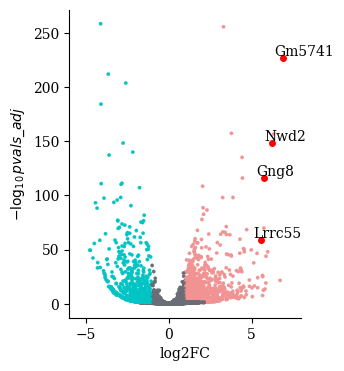

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(3, 4))
colors = ["#f09392", "#686d76","#01c5c4"]
sns.set_palette(sns.color_palette(colors))

sns.scatterplot(x='logfoldchanges', y='log(pvals_adj)',data=rank_gene_df,
                hue='type',#颜色映射
                edgecolor = None,#点边界颜色
                s=6,#点大小
                ax=ax
                )
for i, marker in enumerate (marker_list):
    temp_df=marker_df[marker_df["gene name"]==marker]
    ax.plot(temp_df.logfoldchanges,temp_df["log(pvals_adj)"],color="red", marker='o',markersize=4)
    ax.text(temp_df.logfoldchanges-0.5,temp_df["log(pvals_adj)"]+2,marker)
ax.set_xlabel("log2FC")
ax.set_xlim((-6,8))
ax.get_legend().remove()
# ax.set_ylim((0,50))
# ?ax.set_yscale("log") 
ax.spines["right"].set_visible(False)

ax.spines["top"].set_visible(False)
ax.set_ylabel(r"$-\log_{10}{pvals\_adj}$")
# plt.savefig("./figure/volcano.png",dpi=900, bbox_inches="tight")
# plt.show()
plt.savefig("./figure/volcano.pdf", bbox_inches="tight")

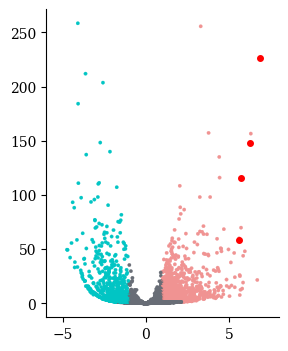

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(3, 4))
colors = ["#f09392", "#686d76","#01c5c4"]
sns.set_palette(sns.color_palette(colors))

sns.scatterplot(x='logfoldchanges', y='log(pvals_adj)',data=rank_gene_df,
                hue='type',#颜色映射
                edgecolor = None,#点边界颜色
                s=6,#点大小
                ax=ax
                )
for i, marker in enumerate (marker_list):
    temp_df=marker_df[marker_df["gene name"]==marker]
    ax.plot(temp_df.logfoldchanges,temp_df["log(pvals_adj)"],color="red", marker='o',markersize=4)
    # ax.text(temp_df.logfoldchanges-0.5,temp_df["log(pvals_adj)"]+2,marker)
ax.set_xlabel("")
ax.set_ylabel("")
# ax.set_xticks([])
# ax.set_yticks([])
ax.set_xlim((-6,8))
ax.get_legend().remove()

# ax.set_ylim((0,50))
# ?ax.set_yscale("log") 
ax.spines["right"].set_visible(False)

ax.spines["top"].set_visible(False)
# ax.set_ylabel(r"$-\log_{10}{pvals\_adj}$")
plt.savefig("./figure/volcano_notext.png",dpi=900, bbox_inches="tight")


In [291]:
center=(4300,-1100);radius=2400
c_adata_0=get_cricle_data(spatialign_data1,radius,center)

c_adata_0.shape,spatialign_data1.shape

((31453, 11376), (33587, 11376))

In [448]:
# with open("./data/hclust_fig_final.pkl","wb") as f:
#     pickle.dump(data,f)


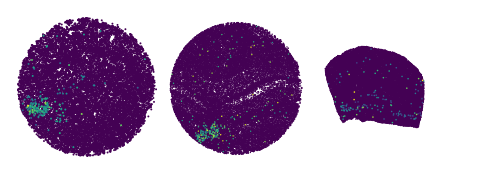

In [462]:
genen_name="Lrrc55"
fig, ax = plt.subplots(1, 3, figsize=(6, 2))

sc.pl.spatial(spatialign_data0, color=genen_name,spot_size=70,ax=ax[0], title="", show=False,colorbar_loc=None)
i=ax[0]
i.set_xlabel("")
i.set_ylabel("")
i.spines["right"].set_visible(False)
i.spines["left"].set_visible(False)
i.spines["top"].set_visible(False)
i.spines["bottom"].set_visible(False)

scale=1.05
sc.pl.spatial(spatialign_data1, color=genen_name,spot_size=50,ax=ax[1], title="", show=False,colorbar_loc=None)
i=ax[1]
i.set_xlabel("")
i.set_ylabel("")
i.spines["right"].set_visible(False)
i.spines["left"].set_visible(False)
i.spines["top"].set_visible(False)
i.spines["bottom"].set_visible(False)
i.set_xlim((i.get_xlim()[0]*scale,i.get_xlim()[1]*scale))
i.set_ylim((i.get_ylim()[0]*scale,i.get_ylim()[1]*scale))

scale=1.5
axs=sc.pl.spatial(spatialign_data2, color=genen_name,spot_size=20, ax=ax[2],title="", show=False,basis="spatial",colorbar_loc=None)
i=axs[0]
i.set_xlabel("")
i.set_ylabel("")
i.spines["right"].set_visible(False)
i.spines["left"].set_visible(False)
i.spines["top"].set_visible(False)
i.spines["bottom"].set_visible(False)
# i.set_xlim((i.get_xlim()[0]*scale-i.get_xlim()[0]+30,i.get_xlim()[1]*scale-i.get_xlim()[1]+30))
# i.set_ylim((i.get_ylim()[0]*scale-i.get_ylim()[0]+500,i.get_ylim()[1]*scale-i.get_ylim()[0]+500))
i.set_xlim((i.get_xlim()[0],i.get_xlim()[1]*scale))
fig.subplots_adjust(wspace=0, hspace=0)
plt.show()
# plt.savefig("./figure/fig_hclust_16_Enpp2.png",dpi=900, bbox_inches="tight")

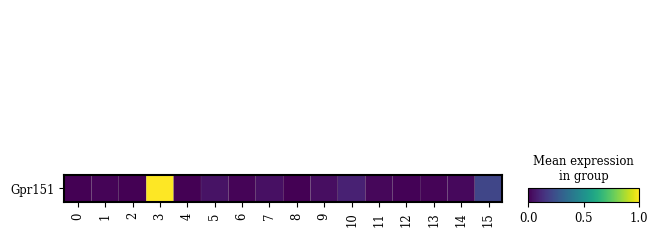

In [4]:
spatialign_merge=sc.read_h5ad("./data/spatialign_merge_for_figure.h5ad")